In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()
# Age-177, cabin-687, Embarked-2
# 891 rows 12 columns.

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


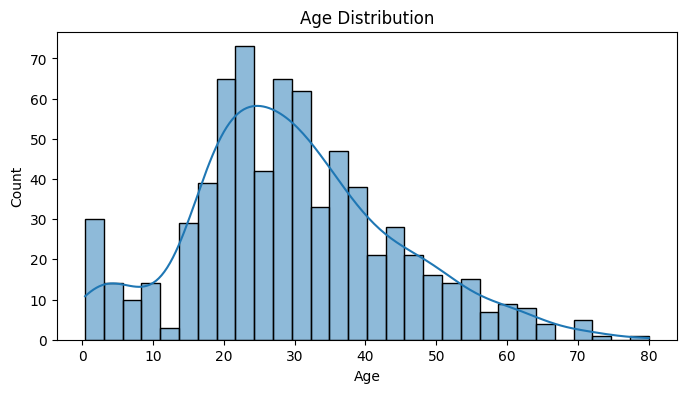

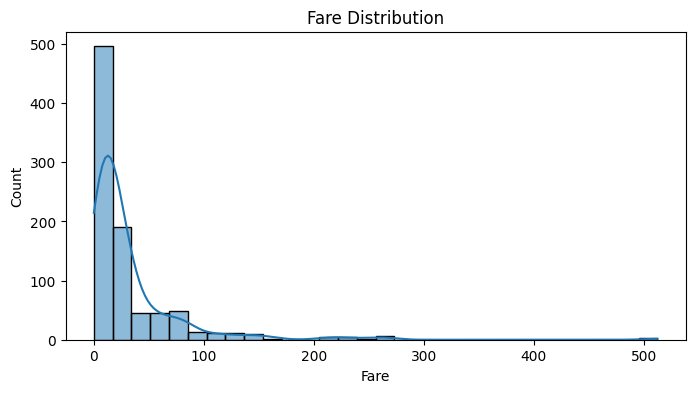

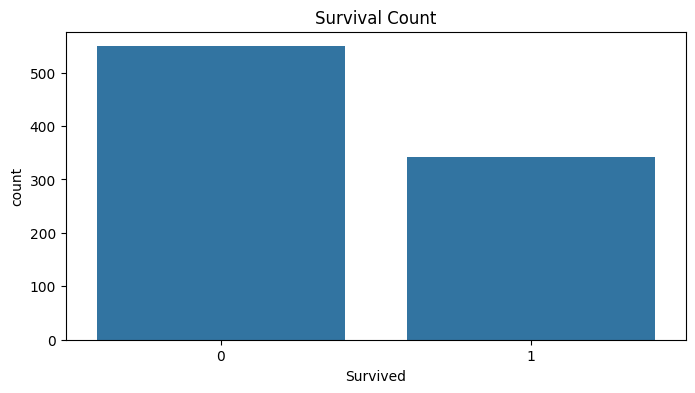

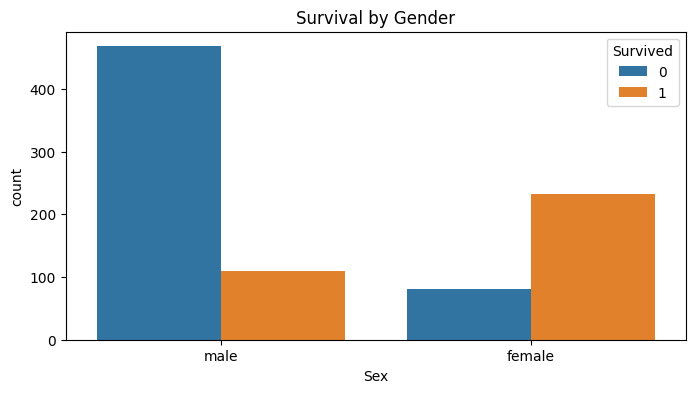

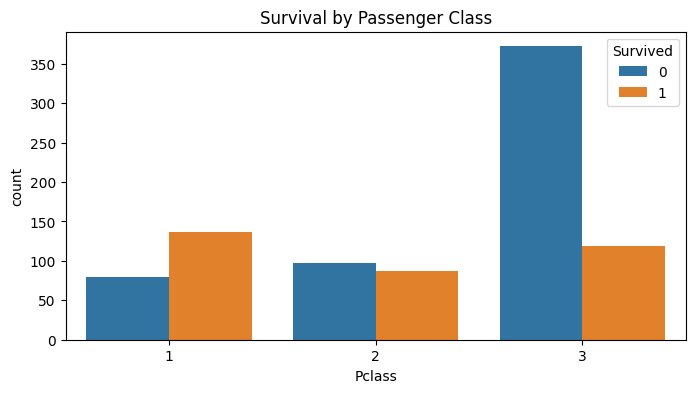

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],kde=True,bins=30)
plt.title("Age Distribution")
plt.show()

#Fare
plt.figure(figsize=(8,4))
sns.histplot(df['Fare'],kde=True,bins=30)
plt.title("Fare Distribution")
plt.show()

#overal survival count
plt.figure(figsize=(8,4))
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.show()

#survival by gender
plt.figure(figsize=(8,4))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival by Gender")
plt.show()

#survival by passenger class
plt.figure(figsize=(8,4))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by Passenger Class")
plt.show()

In [ ]:
# Feature Extraction
#1
df['FamilySize']=df['SibSp']+df['Parch']+1
df[['SibSp','Parch','FamilySize']].head()

#2
df['IsAlone']=1
df.loc[df['FamilySize']>1,'IsAlone']=0
df[['FamilySize','IsAlone']].head()

#3
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'].value_counts()
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
     'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
df['Title'].value_counts()

#4
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 50, 80],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)
df[['Age', 'AgeGroup']].head()

#5
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])
df[['Fare', 'FareGroup']].head()


<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1911107697.py:12: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')


,Fare,FareGroup
0,7.2500,Low
1,71.2833,Very High
2,7.9250,Mid
3,53.1000,Very High
4,8.0500,Mid


In [ ]:
df.head()
df['IsAlone'].value_counts(normalize=True)

,proportion
IsAlone,
1,0.602694
0,0.397306


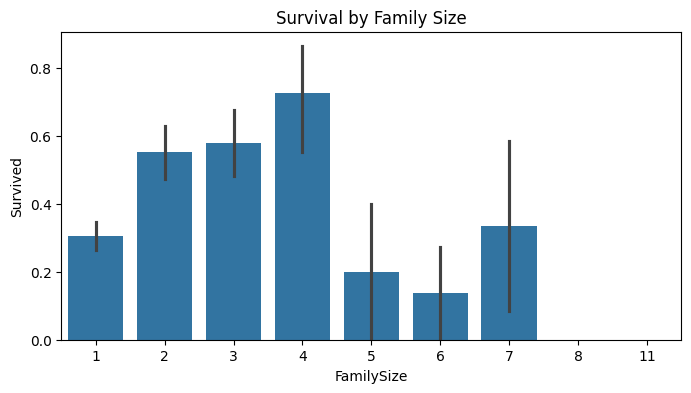

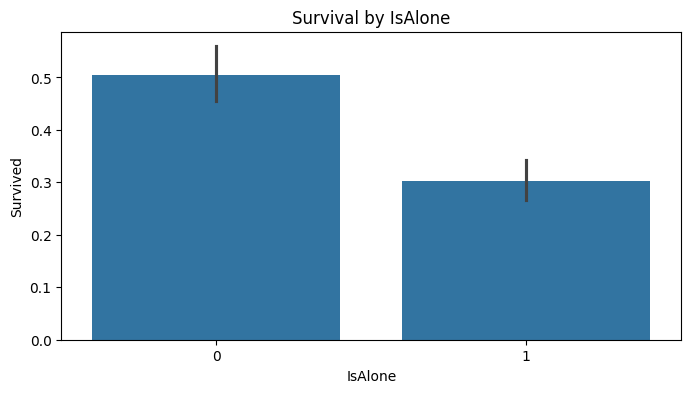

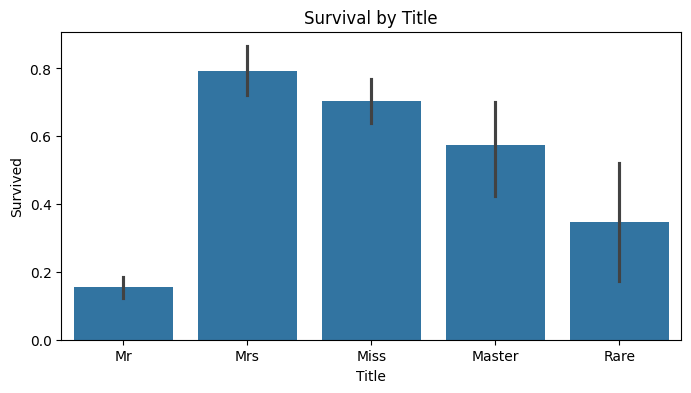

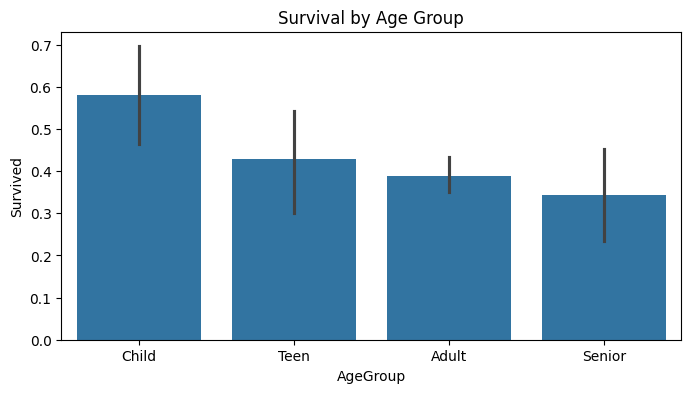

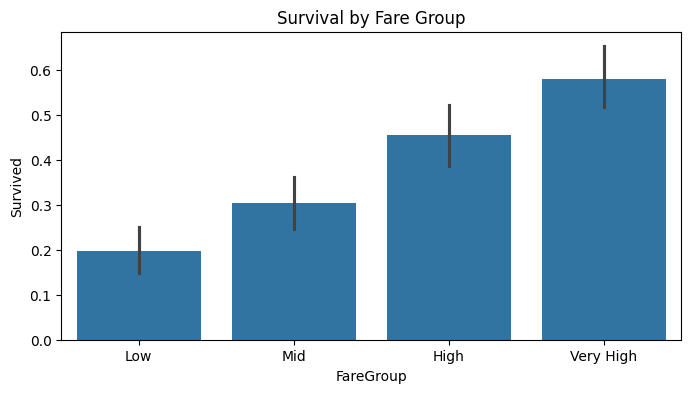

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='FamilySize',y='Survived')
plt.title("Survival by Family Size")
plt.show()

#survival for isalone
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='IsAlone',y='Survived')
plt.title("Survival by IsAlone")
plt.show()

#surviival by title
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='Title',y='Survived')
plt.title("Survival by Title")
plt.show()

#survival by age group
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='AgeGroup',y='Survived')
plt.title("Survival by Age Group")
plt.show()

#survival by fare group
plt.figure(figsize=(8,4))
sns.barplot(data=df,x='FareGroup',y='Survived')
plt.title("Survival by Fare Group")
plt.show()
#

In [ ]:
#missing values
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df['Age']=df.groupby('Title')['Age'].transform(lambda x:x.fillna(x.median()))
df.isnull().sum()

/tmp/ipython-input-2611983150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
/tmp/ipython-input-2611983150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#df.drop(columns=['Cabin'],inplace=True)
df['AgeGroup'].fillna(df['AgeGroup'].mode()[0],inplace=True)
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#encoding
df_encoded=pd.get_dummies(df,columns=['Sex','Embarked','Title','AgeGroup','FareGroup'])
df_encoded.head()

#drop unused columns
df_encoded.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df_encoded.head()
#

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,...,Title_Mrs,Title_Rare,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,FareGroup_Low,FareGroup_Mid,FareGroup_High,FareGroup_Very High
0,0,3,22.0,1,0,7.2500,2,0,False,True,...,False,False,False,False,True,False,True,False,False,False
1,1,1,38.0,1,0,71.2833,2,0,True,False,...,True,False,False,False,True,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,1,1,True,False,...,False,False,False,False,True,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,2,0,True,False,...,True,False,False,False,True,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,1,1,False,True,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
x=df_encoded.drop(columns=['Survived'])
y=df_encoded['Survived']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
#

In [ ]:
#scaling for Logistic regression,Svm,Neural networks
from sklearn.preprocessing import StandardScaler
num_cols=['Age','Fare','FamilySize']
scaler=StandardScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.transform(x_test[num_cols])
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,...,Title_Mrs,Title_Rare,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior,FareGroup_Low,FareGroup_Mid,FareGroup_High,FareGroup_Very High
692,3,0.036076,0,0,0.513812,-0.556339,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
481,2,0.036076,0,0,-0.662563,-0.556339,1,False,True,False,...,False,False,False,False,True,False,True,False,False,False
527,1,0.036076,0,0,3.955399,-0.556339,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True
855,3,-0.868950,0,1,-0.467874,0.073412,0,True,False,False,...,True,False,False,True,False,False,False,True,False,False
801,2,0.111495,1,1,-0.115977,0.703162,0,True,False,False,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8547486033519553
[[100  10]
 [ 16  53]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.84      0.77      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

0.8212290502793296
[[96 14]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

0.8212290502793296
[[97 13]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro a

In [ ]:
''' The classification report shows that Logistic Regression
provides the best balance between precision and recall,
outperforming Random Forest and XGBoost on this dataset.'''

' The classification report shows that Logistic Regression \nprovides the best balance between precision and recall, \noutperforming Random Forest and XGBoost on this dataset.'

In [ ]:
import joblib
import os

# Define the directory path
output_dir = '../data'
os.makedirs(output_dir, exist_ok=True)

joblib.dump(log_reg, os.path.join(output_dir, 'final_titanic_model.pkl'))

['../data/final_titanic_model.pkl']

In [ ]:
model = joblib.load("../data/final_titanic_model.pkl")
prediction = model.predict(x_test[:5])
prediction

array([0, 0, 0, 0, 1])

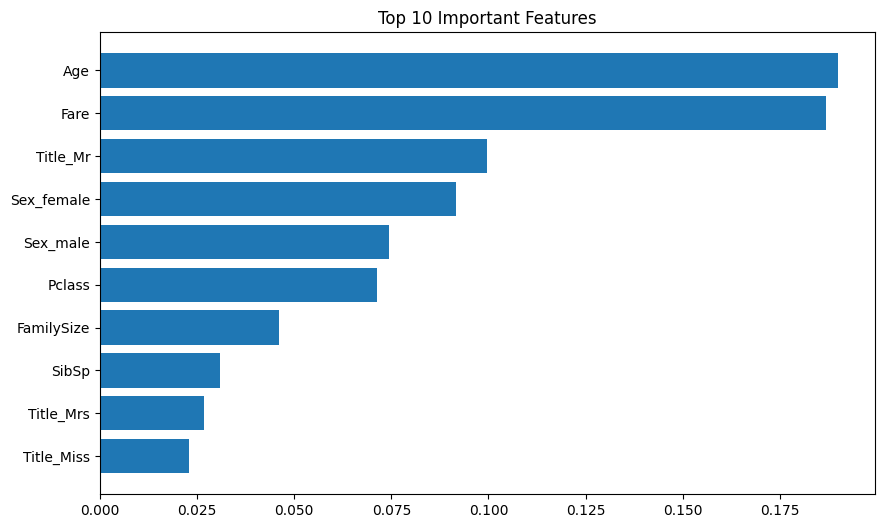

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance plot (for tree-based models)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), x.columns[indices])
plt.title("Top 10 Important Features")
plt.show()
